1. ### Importing libraries/data, dropping categorical columns, removing rows with missing values

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [45]:
# This option ensures the graphs are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [46]:
# Define path

path = r'C:\Users\dbnew\Achievement_6'

In [47]:
#Import data
df = pd.read_pickle(os.path.join(path, 'Prepared_Data', 'air_qual_cleaned.pkl'))

In [48]:
df.columns

Index(['WHO Region', 'WHO Country Name', 'City or Locality',
       'Measurement Year', 'PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)',
       'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)',
       'NO2 temporal coverage (%)', 'Reference',
       'Number and type of monitoring stations', 'Version of the database'],
      dtype='object')

In [49]:
#Dropping categorical columns
df.drop(columns = ['WHO Region', 'WHO Country Name', 'City or Locality',
       'Measurement Year', 'Reference',
       'Number and type of monitoring stations', 'Version of the database'], inplace=True)

In [50]:
df.head()

,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%)
0,12.63,29.04,10.88,75.0,75.0,75.0
1,18.91,37.40,NaN,75.0,75.0,NaN
2,14.86,36.34,17.20,75.0,75.0,75.0
3,35.47,54.22,38.83,75.0,75.0,75.0
4,23.39,130.19,21.12,75.0,75.0,75.0


#### Removing rows with missing values



In [51]:
df.dropna(inplace = True)

### 2. The elbow technique

In [52]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [53]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\dbnew\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


[-4334503.324176693,
 -2145505.110215533,
 -1573126.3729847996,
 -1292368.0302515586,
 -1087781.31005172,
 -979560.4782986734,
 -875812.6225659357,
 -808892.3362695469,
 -753170.9447986752]

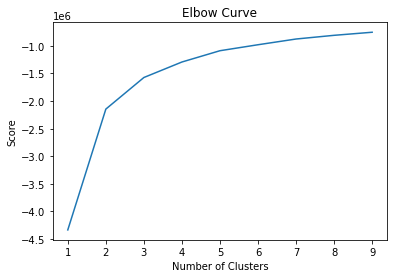

In [54]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The curve begins to flatten at about 5, so I will choose this as the optimal number of clusters.

### 3. k-means clustering

In [55]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5, n_jobs = -1) 


In [56]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\dbnew\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=5, n_jobs=-1)

In [57]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\dbnew\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [58]:
df.head()

,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),clusters
0,12.63,29.04,10.88,75.0,75.0,75.0,0
2,14.86,36.34,17.20,75.0,75.0,75.0,3
3,35.47,54.22,38.83,75.0,75.0,75.0,4
4,23.39,130.19,21.12,75.0,75.0,75.0,1
5,11.73,23.90,11.61,75.0,75.0,75.0,0


In [59]:
df['clusters'].value_counts()

0    625
3    552
4    229
1    193
2     54
Name: clusters, dtype: int64

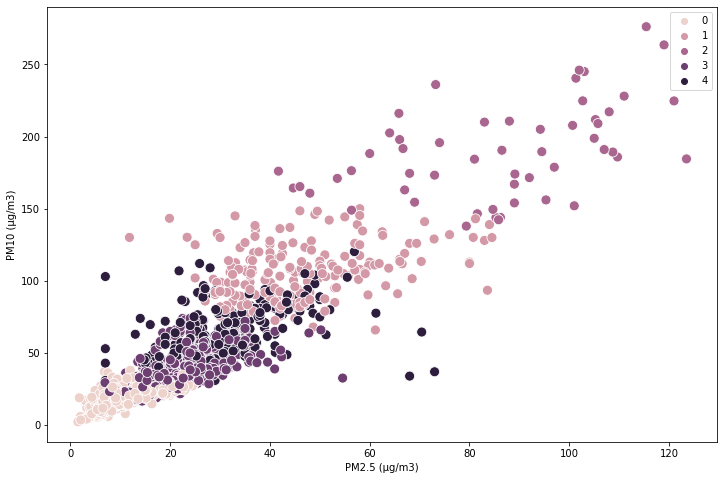

In [60]:
# Plot the clusters for the "PM2.5" and "PM10" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['PM2.5 (μg/m3)'], y=df['PM10 (μg/m3)'], hue=kmeans.labels_, s=100) 
# Here, I'm subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points I want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('PM2.5 (μg/m3)') # Label x-axis.
plt.ylabel('PM10 (μg/m3)') # Label y-axis.
plt.show()

The groups appear to be bounded by ranges on both the x- and y-axes, such that they are general regions surrounding the regression line we saw in the previous exercise. There is nothing particularly earth-shattering here.

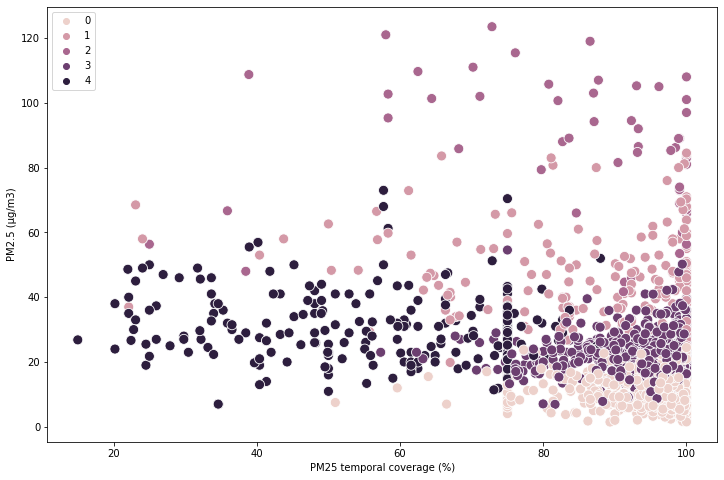

In [61]:
# Plot the clusters for the "PM2.5" and "PM25 temporal coverage" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['PM25 temporal coverage (%)'], y=df['PM2.5 (μg/m3)'], hue=kmeans.labels_, s=100) 
# Here, I'm subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points I want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('PM25 temporal coverage (%)') # Label x-axis.
plt.ylabel('PM2.5 (μg/m3)') # Label y-axis.
plt.show()

The most interesting group here is group zero, as there appears to be a dense group of points at the lowest end of the PM2.5 concentration range but the highest end of the temporal coverage range. Group 3 follows a similar pattern, but the PM2.5 concentration is mid-range.  These groups make sense because you would expect that communities that have the resources and will to actively monitor their air quality would also be the ones to take steps to reduce pollution. Group 1 is also interesting because it shows there is a cluster of points for which the temporal coverage doesn't seem to have much affect on pollution levels, although this cluster is not as dense as the ones on the right.

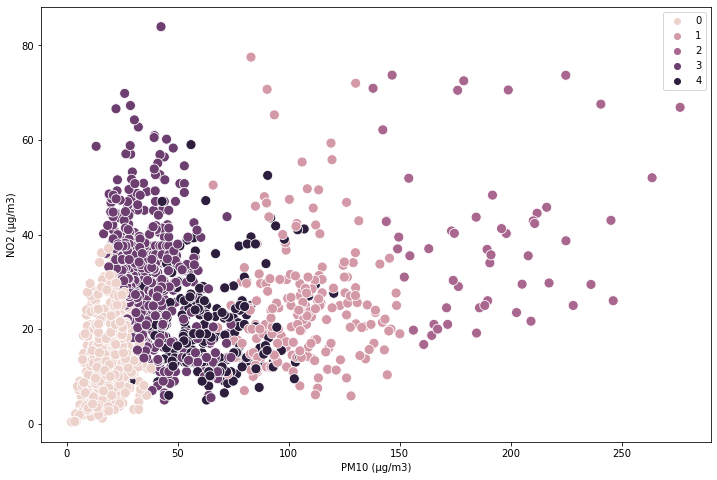

In [62]:
# Plot the clusters for the "PM10" and "NO2" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['PM10 (μg/m3)'], y=df['NO2 (μg/m3)'], hue=kmeans.labels_, s=100) 
# Here, I'm subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points I want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('PM10 (μg/m3)') # Label x-axis.
plt.ylabel('NO2 (μg/m3)') # Label y-axis.
plt.show()

Groups 0 and 1 show the upper range of NO2 increasing a bit as PM10 increases. The most interesting group is group 4, which shows that communities with PM10 ranging between 50 and 100 actually tend to have less NO2 pollution overall than the groups on either side of that range. It would be interesting to explore why that is the case.

In [63]:
df.loc[df['clusters'] == 4, 'cluster'] = 'black'
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'dark pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [64]:
df.columns

Index(['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)',
       'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)',
       'NO2 temporal coverage (%)', 'clusters', 'cluster'],
      dtype='object')

In [65]:
df.groupby('cluster').agg({'PM2.5 (μg/m3)':['mean', 'median'], 
                         'PM10 (μg/m3)':['mean', 'median'], 
                         'NO2 (μg/m3)':['mean', 'median'],
                          'PM25 temporal coverage (%)':['mean', 'median'],
                          'PM10 temporal coverage (%)':['mean', 'median'],
                          'NO2 temporal coverage (%)':['mean', 'median']})

PM2.5 (μg/m3)         PM10 (μg/m3)          NO2 (μg/m3)          \
                     mean  median         mean   median        mean  median   
cluster                                                                       
black           30.045808  29.000    64.087118   61.900   20.812926  19.000   
dark pink       46.121658  44.600   106.338031  105.670   24.915544  23.000   
dark purple     22.507500  21.815    37.917645   35.145   30.542409  30.305   
pink            11.489376  10.940    19.324064   19.840   13.856672  13.720   
purple          85.646667  87.250   189.017593  187.015   39.482963  36.980   

            PM25 temporal coverage (%)            PM10 temporal coverage (%)  \
                                  mean     median                       mean   
cluster                                                                        
black                        56.501698  59.000000                  77.601480   
dark pink                    86.691727  92.307692                  92.559579   
dark purple                  92.619112  95.192308                  94.224857   
pink                         94.636346  97.302000                  95.240931   
purple                       84.359802  91.826923                  88.090867   

                       NO2 temporal coverage (%)             
                median                      mean     median  
cluster                                                      
black        75.000000                 77.648022  75.000000  
dark pink    95.673077                 91.322729  95.192308  
dark purple  96.390500                 93.724942  95.677096  
pink         97.491500                 94.847366  96.621005  
purple       94.098333                 84.870995  91.443750

The pink cluster has the best stats in all categories. It has the lowest levels of pollution and the highest temporal coverages. I would expect this cluster to correspond to communities that prioritize environmental protection. One hypothesis is that these communities are in less industrialized parts of developed nations where the government is able to monitor air quality nationwide.The purple cluster has the highest pollution levels and also relatively high temporal coverages. One could hypothesize that this group corresponds to highly industrialized nations with few environmental protections that still make an effort to monitor air quality. The dark pink group has the lowest temporal coverages, but its pollution levels are in the middle compared to the rest of the clusters. This is counterintuitive, showing that the relationship between monitoring and pollution levels we saw in the pink cluster doesn't hold at the lower end of the monitoring spectrum.

In [66]:
# Export data to excel

df.to_excel(os.path.join(path, 'Prepared_Data', 'air_qual_clusters.xlsx'))